In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing


# %% matplotlib inline

In [4]:
np.random.seed(42)

num_rows = 2000
num_columns = 15

data = np.random.randn(num_rows, num_columns)

column_names = [
    "Income",
    "Age",
    "Education",
    "Experience",
    "Location",
    "SocialMediaUsage",
    "FitnessLevel",
    "HappinessScore",
    "CoffeeConsumption",
    "FavoriteColor",
    "MusicPreference",
    "TVWatchingHours",
    "TravelFrequency",
    "PetOwnership",
    "RandomFactor"
]

X = pd.DataFrame(data, columns=column_names)

# Add a target column for regression (e.g., random values)
y = 5000 + 1000 * X['Income'] - 300 * X['Age'] + np.random.randn(num_rows) * 2000

# Display the first few rows of the DataFrame
print(X.head())


     Income       Age  Education  Experience  Location  SocialMediaUsage  \
0  0.496714 -0.138264   0.647689    1.523030 -0.234153         -0.234137   
1 -0.562288 -1.012831   0.314247   -0.908024 -1.412304          1.465649   
2 -0.601707  1.852278  -0.013497   -1.057711  0.822545         -1.220844   
3 -0.719844 -0.460639   1.057122    0.343618 -1.763040          0.324084   
4 -0.479174 -0.185659  -1.106335   -1.196207  0.812526          1.356240   

   FitnessLevel  HappinessScore  CoffeeConsumption  FavoriteColor  \
0      1.579213        0.767435          -0.469474       0.542560   
1     -0.225776        0.067528          -1.424748      -0.544383   
2      0.208864       -1.959670          -1.328186       0.196861   
3     -0.385082       -0.676922           0.611676       1.031000   
4     -0.072010        1.003533           0.361636      -0.645120   

   MusicPreference  TVWatchingHours  TravelFrequency  PetOwnership  \
0        -0.463418        -0.465730         0.241962     -

In [5]:
# dataset_ = fetch_openml(data_id= 227, parser='auto')
# X, y = dataset_.data, dataset_.target
# X.shape

In [6]:
# X.head()

In [7]:
# removing cat cols because we want to laze around
# X = X.drop(['instance_id', 'repetition', 'algorithm', 'runstatus' ], axis=1)

In [8]:
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
X_transformed = pd.DataFrame(scaled_data , columns=X.columns)
X_transformed.shape

(2000, 15)

In [9]:
X_transformed.head(100)

,Income,Age,Education,Experience,Location,SocialMediaUsage,FitnessLevel,HappinessScore,CoffeeConsumption,FavoriteColor,MusicPreference,TVWatchingHours,TravelFrequency,PetOwnership,RandomFactor
0,0.505319,-0.146379,0.635764,1.511046,-0.247711,-0.224211,1.578510,0.782780,-0.437795,0.557078,-0.479405,-0.501865,0.261881,-1.898657,-1.744255
1,-0.524621,-1.032916,0.297685,-0.914965,-1.451971,1.462633,-0.243502,0.089781,-1.424711,-0.543152,0.087575,-1.180599,0.394475,-0.596015,-0.296796
2,-0.562958,1.871407,-0.034618,-1.064341,0.832405,-1.203406,0.195237,-1.917409,-1.324951,0.207154,0.707078,0.129162,-0.092676,-0.298761,-1.495412
3,-0.677854,-0.473166,1.050892,0.334081,-1.810481,0.329759,-0.404311,-0.647321,0.679167,1.051489,0.897420,-0.871794,-0.284588,0.328789,0.983029
4,-0.443788,-0.194423,-1.142656,-1.202550,0.822164,1.354057,-0.088286,1.016548,0.420844,-0.645120,0.334839,1.482808,-0.013536,1.552774,-2.647969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1.890158,2.078127,-1.139486,-0.229619,-0.291317,0.313209,0.807834,0.874900,-0.555161,-0.161279,0.257033,-0.286894,1.615607,0.487284,0.739972
96,0.666926,1.183312,0.162606,-1.302966,0.400177,-0.638255,-0.549199,0.603496,1.326529,0.029417,0.282950,1.645422,0.260682,2.581914,0.568921
97,-1.690207,0.757430,0.365527,1.278253,0.679731,-0.129259,-1.251442,-0.184040,-0.831463,-0.579734,0.559110,1.613420,0.413286,-1.186725,0.446813
98,1.186029,-0.624351,-0.156815,0.005833,-0.810662,0.651488,-0.137686,0.438311,-0.869659,-0.434920,0.691198,-0.409853,1.734204,-0.396543,0.224711


In [10]:

# Initialize the coefficients (weights) with random values.
np.random.seed(100)
theta = np.random.randn(X_transformed.shape[1]+1, 1)
theta.shape


(16, 1)

In [11]:
# Add a bias term (intercept) to the input features.
X_b = pd.DataFrame(np.c_[np.ones((X_transformed.shape[0], 1)), X_transformed], columns=['bias']+list(X_transformed.columns))
X_b.shape

(2000, 16)

In [12]:
X_b.head()

,bias,Income,Age,Education,Experience,Location,SocialMediaUsage,FitnessLevel,HappinessScore,CoffeeConsumption,FavoriteColor,MusicPreference,TVWatchingHours,TravelFrequency,PetOwnership,RandomFactor
0,1.0,0.505319,-0.146379,0.635764,1.511046,-0.247711,-0.224211,1.578510,0.782780,-0.437795,0.557078,-0.479405,-0.501865,0.261881,-1.898657,-1.744255
1,1.0,-0.524621,-1.032916,0.297685,-0.914965,-1.451971,1.462633,-0.243502,0.089781,-1.424711,-0.543152,0.087575,-1.180599,0.394475,-0.596015,-0.296796
2,1.0,-0.562958,1.871407,-0.034618,-1.064341,0.832405,-1.203406,0.195237,-1.917409,-1.324951,0.207154,0.707078,0.129162,-0.092676,-0.298761,-1.495412
3,1.0,-0.677854,-0.473166,1.050892,0.334081,-1.810481,0.329759,-0.404311,-0.647321,0.679167,1.051489,0.897420,-0.871794,-0.284588,0.328789,0.983029
4,1.0,-0.443788,-0.194423,-1.142656,-1.202550,0.822164,1.354057,-0.088286,1.016548,0.420844,-0.645120,0.334839,1.482808,-0.013536,1.552774,-2.647969


In [109]:
def compute_gradient(weights, X_b, y):
    # Calculate the gradient of the mean squared error loss.
    gradient = X_b.T.dot(X_b.dot(weights) - y) / len(y)
    return gradient

gradient1 = compute_gradient(theta, X_b, y)[0]

def compute_loss(weights, X_b, y):
    # Calculating the loss or cost
    y_predicted = X_b.dot(weights)
    cost = np.sum((y-y_predicted)**2) / len(y)
    return cost
#
# # need to check convergence of loss with this
loss1 = compute_loss(gradient1.values.reshape(-1,1), X_b, y)[0]
gradient1, loss1


(bias                 3565.598203
 Income               1215.525330
 Age                  -374.708666
 Education             344.719120
 Experience            246.468261
 Location              431.359701
 SocialMediaUsage      -53.606955
 FitnessLevel           57.869370
 HappinessScore        -54.986582
 CoffeeConsumption    -354.294412
 FavoriteColor          71.619677
 MusicPreference        45.053527
 TVWatchingHours       180.841789
 TravelFrequency       115.797516
 PetOwnership           70.781427
 RandomFactor         -161.554054
 Name: 0, dtype: float64,
 6216397.1687092725)

In [14]:
## Vanilla gradient descent
# # Define the number of iterations and learning rate.
num_iterations = 500
learning_rate = 0.03

def gradient_descent(weights, X_b, y, learning_rate, num_iterations):
    loss_list = []
    for iteration in range(num_iterations):
        # print(iteration)
        gradient = compute_gradient(weights, X_b, y)[0]
        gradient = gradient.values.reshape((-1,1))
        # print('shapes (weight, gradient)', weights.shape, gradient.shape)
        weights = weights - learning_rate * gradient
        loss = compute_loss(weights, X_b, y)[0]
        loss_list.append(loss)
        print('iteration', iteration, ' loss:', loss)
    return weights, loss_list

fin_weights, loss_list_vanilla = gradient_descent(theta, X_b, y, learning_rate, num_iterations)

iteration 0  loss: 2345299.504559718
iteration 1  loss: 2206692.3093053084
iteration 2  loss: 2076276.7990597964
iteration 3  loss: 1953568.8452474568
iteration 4  loss: 1838112.9312912098
iteration 5  loss: 1729480.4616434937
iteration 6  loss: 1627268.170753413
iteration 7  loss: 1531096.6260639348
iteration 8  loss: 1440608.8194819405
iteration 9  loss: 1355468.8420924142
iteration 10  loss: 1275360.6371970095
iteration 11  loss: 1199986.8270480474
iteration 12  loss: 1129067.6089225297
iteration 13  loss: 1062339.7164381836
iteration 14  loss: 999555.442255724
iteration 15  loss: 940481.7185394171
iteration 16  loss: 884899.251762422
iteration 17  loss: 832601.7086451385
iteration 18  loss: 783394.9502045978
iteration 19  loss: 737096.311071536
iteration 20  loss: 693533.9213998276
iteration 21  loss: 652546.0688510721
iteration 22  loss: 613980.5982858916
iteration 23  loss: 577694.3469334735
iteration 24  loss: 543552.6129425912
iteration 25  loss: 511428.65534126293
iteration 26

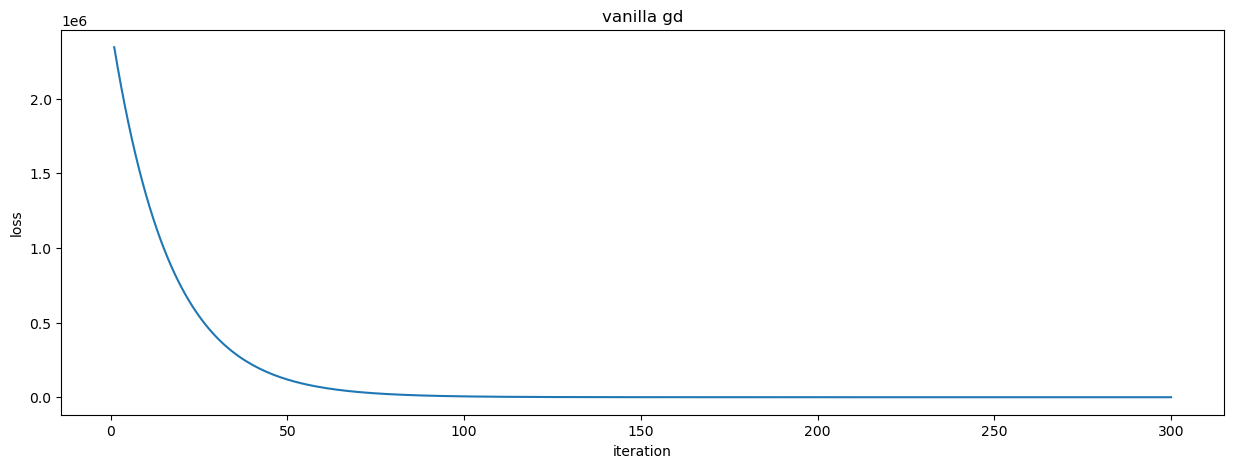

In [16]:
plt.figure(figsize=(15,5))
plt.plot([i for i in range(1, len(loss_list_vanilla[:300])+1)] ,  loss_list_vanilla[:300])
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('vanilla gd')
plt.show()

In [36]:
# num_iterations = 500
# learning_rate = 0.01
#
# def stochastic_gradient_descent(weights, X_b, y, learning_rate, num_iterations):
#     # Store the number of data points
#     m = len(y)
#
#     # Lists to store the loss at each iteration
#     loss_history = []
#
#     for epoch in range(num_iterations):
#         for i in range(m):
#             # Randomly select a data point
#             # random_index = i
#             random_index = np.random.randint(0, m)
#             xi = X_b[random_index:random_index+1]
#             yi = y[random_index:random_index+1]
#             # print('error old: ', compute_loss(weights, X_b, y)[0] )
#             predicted = np.dot(xi, weights)
#             error = predicted - yi.values.reshape(-1,1)
#
#             # Update the weights using the gradient
#             gradient = xi.T.dot(error)
#             # print('xiT, gradient: ', xi.T.shape, gradient.shape)
#             # weights = weights - (learning_rate / (epoch + 1)) * gradient  # Learning rate decay
#             weights = weights - learning_rate * gradient
#             # print('error old, new: ', error,  np.dot(xi, weights)-yi.values.reshape(-1,1) )
#             # print('error new: ', random_index, compute_loss(weights, X_b, y)[0] )
#         # Compute and store the loss
#         loss = compute_loss(weights, X_b, y)[0]
#         loss_history.append(loss)
#
#         # Print the loss for this epoch
#         print(f"Epoch {epoch+1}/{num_iterations}, Loss: {loss}")
#
#     return weights, loss_history
#
# 1+1

2

In [136]:
def  cal_cost(theta,X,y):

    m = len(y)

    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

def compute_gradient_(X, y, weights):
    # print('\n')
    # print('x weight shape ', X.shape, weights.shape, y.shape)
    y_pred = np.array(X.dot(weights)[0])
    y = np.array(y)
    error = y - y_pred
    # print('y_pred: ')
    # print( y_pred, y_pred.shape)
    # print('y', y, y.shape)
    # print('error', error, error.shape)

    gradient = -2/X.shape[0] * X.T.dot(error)
    # print('gradeient:  ',X.T.dot(y - y_pred).shape, gradient.shape)
    return gradient


def compute_loss(weights, X_b, y):
    # Calculating the loss or cost
    y = y.values.reshape(-1,1)
    y_predicted = X_b.dot(weights)
    cost = np.sum((y-y_predicted)**2) / len(y)
    cost = float(cost)
    # print('loss: ', np.sum((y-y_predicted)**2))
    return cost


def stochastic_gradient_descent(weights, X, y, learning_rate, n_iterations):
    cost_history = []
    for iteration in range(n_iterations):
        for i in range(X.shape[0]):
            random_index = np.random.randint(X.shape[0])
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            # print('xi weights ' ,xi.shape, weights.shape)
            gradient = compute_gradient_(xi, yi, weights)
            gradient = gradient.values.reshape(-1,1)
            # print(iteration, gradient.shape)
            weights -= learning_rate * gradient

        # print(X.shape, weights.shape)
        print(iteration, compute_loss(weights,X,y))
        cost_history.append(compute_loss(weights,X,y))
    return weights, cost_history

In [150]:
np.random.seed(800)
theta = np.ones((X_transformed.shape[1]+1, 1))
# theta = np.random.randn(X_transformed.shape[1]+1, 1)
learning_rate, num_iterations  = 0.00009, 1000
fin_weights_sgd, loss_list_sgd = stochastic_gradient_descent(theta, X_b, y, learning_rate, num_iterations)

0 16471394.51216566
1 10312992.144480186
2 7151422.137314778
3 5501609.397096774
4 4734799.16101574
5 4357573.768773105
6 4162788.6642542267
7 4105658.6074706013
8 4045773.1263413858
9 4028175.339844083
10 4017969.975599924
11 4014193.6593178664
12 4016536.2910569403
13 4012575.485758946
14 4010966.2403118974
15 4010200.380919401
16 4009198.9730932666
17 4007752.9961540415
18 4006941.969214989
19 4006447.0186282196
20 4007907.9279951267
21 4006176.1178049124
22 4009205.260437555
23 4011333.4018833437
24 4011747.646819278
25 4011418.2547006994
26 4009260.9651025697
27 4007344.1450834186
28 4008159.3849204136
29 4008952.4313909197
30 4006741.793135291
31 4006280.308490676
32 4005425.371444856
33 4008404.6776606026
34 4009629.4242609874
35 4006962.601253351
36 4007715.5071761464
37 4010926.090392214
38 4010403.022500865
39 4008535.8428351856
40 4010651.151187811
41 4007748.246417861
42 4007437.3483814998
43 4008542.022397713
44 4006470.818566375
45 4008630.4657076458
46 4013005.203788483


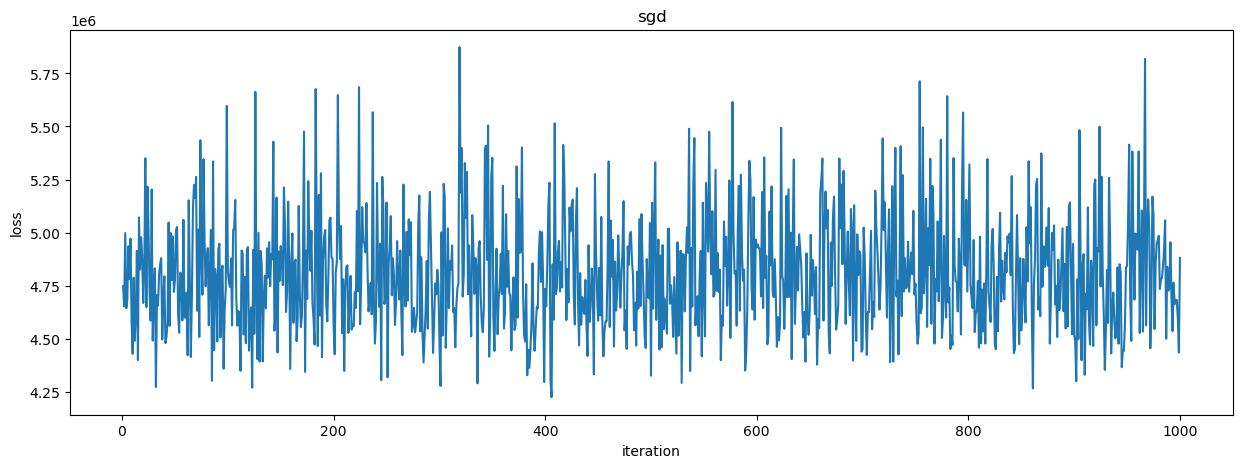

In [138]:
plt.figure(figsize=(15,5))
plt.plot([i for i in range(1, len(loss_list_sgd)+1)] ,  loss_list_sgd)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('sgd')
plt.show()

In [183]:
# mini batch gd

def mini_batch_gradient_descent( X, y, learning_rate=0.01, batch_size=32, num_epochs=100):

    num_samples, num_features = X.shape

    # Initialize weights with zeros
    weights = np.zeros((num_features, 1))

    loss_history = []

    for epoch in range(num_epochs):
        # Shuffle the data
        random_indices = np.random.permutation(num_samples)
        X_shuffled = X[random_indices]
        y_shuffled = y[random_indices]

        for i in range(0, num_samples, batch_size):
            # Get mini-batch
            X_mini_batch = X_shuffled[i:i+batch_size]
            y_mini_batch = y_shuffled[i:i+batch_size].values.reshape(-1,1)

            # Compute predictions
            y_pred = np.dot(X_mini_batch, weights)
            # print('aa', y_pred.shape, y_mini_batch.shape)
            #Compute gradients
            gradient_weights = np.dot(X_mini_batch.T, (y_pred - y_mini_batch)) / batch_size

            # Update weights
            weights -= learning_rate * gradient_weights

        # Compute loss for the entire dataset
        y_pred1 = np.dot(X, weights)

        loss = np.mean((y_pred1[0] - y) ** 2)
        loss_history.append(loss)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss:.4f}")

    return weights, loss_history



In [187]:
learning_rate, batch_size, num_iterations  = 0.09, 64, 1000
fin_weights_mini, loss_list_mini = mini_batch_gradient_descent( X_b.values, y, learning_rate, num_iterations)

Epoch 1/100, Loss: 21805366.4684
Epoch 2/100, Loss: 16190641.6158
Epoch 3/100, Loss: 12419201.4860
Epoch 4/100, Loss: 9907882.9859
Epoch 5/100, Loss: 8225243.4842
Epoch 6/100, Loss: 7119776.8455
Epoch 7/100, Loss: 6400092.7197
Epoch 8/100, Loss: 5942717.1029
Epoch 9/100, Loss: 5651463.6908
Epoch 10/100, Loss: 5473530.8511
Epoch 11/100, Loss: 5369339.0679
Epoch 12/100, Loss: 5311725.5018
Epoch 13/100, Loss: 5285010.3861
Epoch 14/100, Loss: 5276262.3171
Epoch 15/100, Loss: 5278682.8755
Epoch 16/100, Loss: 5287332.9794
Epoch 17/100, Loss: 5298572.4011
Epoch 18/100, Loss: 5311945.3890
Epoch 19/100, Loss: 5325741.2582
Epoch 20/100, Loss: 5338000.3152
Epoch 21/100, Loss: 5348945.3301
Epoch 22/100, Loss: 5358874.1196
Epoch 23/100, Loss: 5366918.2697
Epoch 24/100, Loss: 5373538.3445
Epoch 25/100, Loss: 5382064.4153
Epoch 26/100, Loss: 5389126.0305
Epoch 27/100, Loss: 5393462.7519
Epoch 28/100, Loss: 5397576.1355
Epoch 29/100, Loss: 5399409.9193
Epoch 30/100, Loss: 5400356.3640
Epoch 31/100, Lo

In [179]:
1+1

2